In [ ]:
# Data şekline bakılıyor, data set okutulyor

In [127]:
import pandas as pd
import numpy as np
df = pd.read_csv("datasets/dataset_wisc_sd.csv")
df.shape

(569, 32)

In [128]:
# Datanın özelliklerine bakılıyor

In [129]:
df[["id", "diagnosis", "radius_mean", "texture_mean", "concave points_worst"]].head()

,id,diagnosis,radius_mean,texture_mean,concave points_worst
0,842302,M,17.99,10.38,0.2654
1,842517,M,20.57,17.77,0.186
2,84300903,M,19.69,21.25,0.243
3,84348301,M,11.42,20.38,0.2575
4,84358402,M,20.29,14.34,0.1625


In [130]:
# İstatistiklere bakılır describe komutunu kullanarak pandas'ta

In [131]:
df[["id", "diagnosis", "radius_mean", "texture_mean",
"perimeter_mean", "area_mean", "concave points_worst"]]. describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean
count,5.690000e+02,569.000000,569.000000,569.000000,567.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,655.657848
std,1.250206e+08,3.524049,4.301036,24.298981,352.288768
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.700000
75%,8.813129e+06,15.780000,21.800000,104.100000,785.600000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000


In [132]:
# Tabloyu temizlemek için Kaç adet column olduğu görülür, 32 çıkması lazım

In [133]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [134]:
#Bir satır var ve hatalı, o nedenle string i float a çeviremiyor. Bu hata çok biindik bir hata data'da

In [135]:
df['concave points_worst'] = df['concave points_worst'].astype(float)

ValueError: could not convert string to float: '0.1865\\n\\n'

In [136]:
# Bu hatanın bulunduğu yerleri bulucaz data'da. str.contains komutunu kullanarak //n hatasını bulabiliriz, sonrasında silicez

In [137]:
df[df['concave points_worst'].str.contains(r"\\n")]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
146,869691,M,11.8,16.58,78.99,432.0,0.1091,0.17,0.1659,0.07415,...,13.74,26.38,91.93,591.7,0.1385,0.4092,0.4504,0.1865\n\n,0.5774,0.103


In [138]:
# 146 satırda hata bulundu. 

In [139]:
# 146. line' a bakılıyor

In [140]:
df["concave points_worst"].iloc[146]

'0.1865\\n\\n'

In [141]:
df = df.replace(r'\\n','', regex=True)

In [142]:
df["concave points_worst"].iloc[146]

'0.1865'

In [143]:
#Eksik değer var mı data setinde, 7 satır data'dan eksildi

In [144]:
df.isna().values.sum()

7

In [145]:
# dropna komutu ile eksik değerlerden, satırlardan kurtulunur.

In [146]:
df = df.dropna()

In [147]:
df.isna().values.sum()

0

In [148]:
#value_counts komutunu toplam için kullanabilirz. Diagnosis' de kaç adet M B var?

In [149]:
df['diagnosis'].value_counts()

B    354
M    208
Name: diagnosis, dtype: int64

In [150]:
# seaborn kütüphanesi kullanarak bunları grafikte göstericez.

In [151]:
import seaborn as sns

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

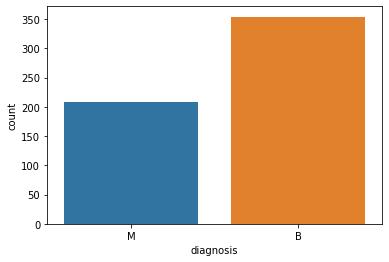

In [152]:
sns.countplot(df['diagnosis'])


In [153]:
# Grafiklerde görmek için

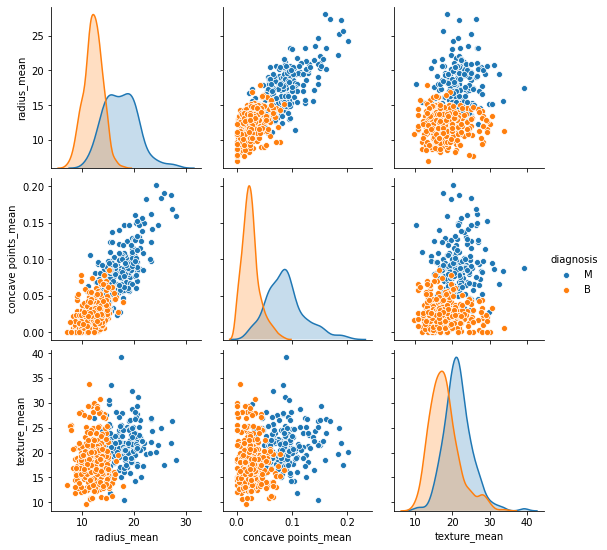

In [154]:
sns.pairplot(df[["diagnosis", "radius_mean", "concave points_mean", "texture_mean"]], hue = 'diagnosis')

In [155]:
#Data'nın 1/4'ünü alıyorum, diğerinin 3/4'ünü alıp farkını alıyoruz istatistiği bulabilmek için.

In [156]:
dfm = df[df["diagnosis"] == "M"]
Q1 = dfm['radius_mean'].quantile(0.25)
Q3 = dfm['radius_mean'].quantile(0.75)
IQR = Q3 - Q1

In [157]:
# X akse diagnosis, y akse radius_mean df datasında. 

In [158]:
# Kaliteli data üretmek için bu istatistiği kullanıyoruz. Üst ve alt tarafta kalan veriler yanlış olabilir. O nedenle ortalamasını alıyoruz.

<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

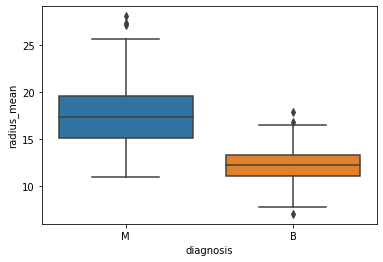

In [159]:
sns.boxplot(x='diagnosis', y='radius_mean', data=df)

In [160]:
#Üstte ve altta kalan dataları çıkarmak için query komutu kullanılır.

In [161]:
df = df.query('(@Q1 - 1.5 * @IQR) <= radius_mean <= (@Q3 + 1.5* @IQR)')

In [162]:
import matplotlib.pyplot as plt

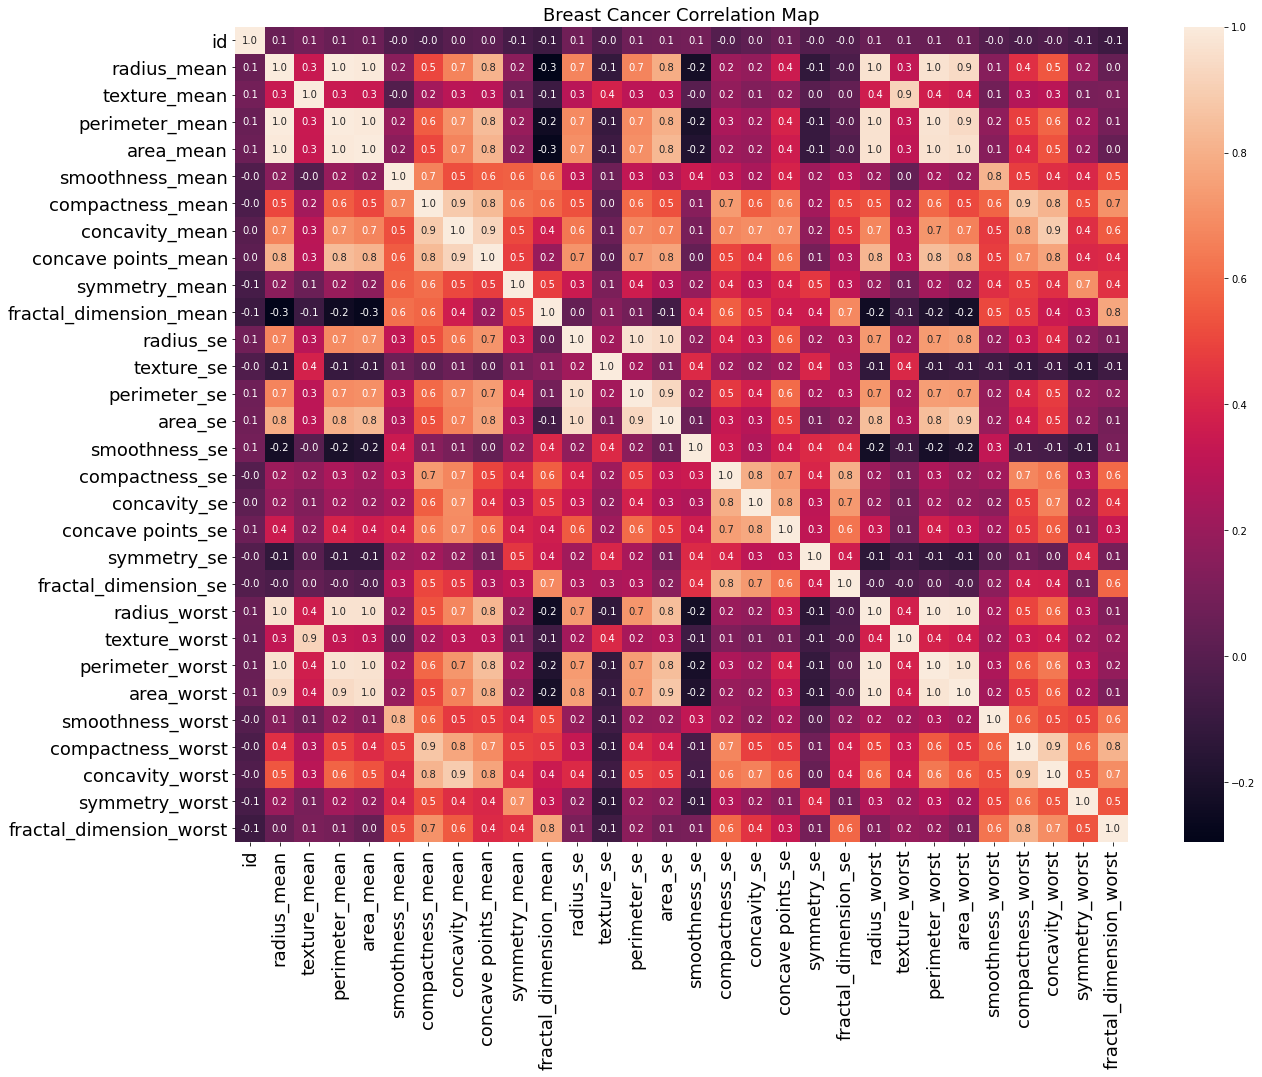

In [163]:
f, ax=plt.subplots( figsize = (20,15))
sns.heatmap(df.corr(), annot= True, fmt = ".1f", ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Breast Cancer Correlation Map', fontsize=18)
plt.show()

In [164]:
#Birbirleriyle çok fazla korole olan dataları çıkarıcaz. Açık renkler korole

In [165]:
#Corr komutunu kullanarak bir matrix yaratılabilir bu değerlerle.

In [166]:
# Üst üçgeni alıcaz ve korelasyonu 0.9 dan büyük olan özellikleri bulucaz. 

In [167]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

/home/beste/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [168]:
#Çıkarıcağımız sütünları drop komutu ile çıkarıcaz. Drop içindeki to_drop kullanarak

In [169]:
df.drop(to_drop, axis=1, inplace= True)

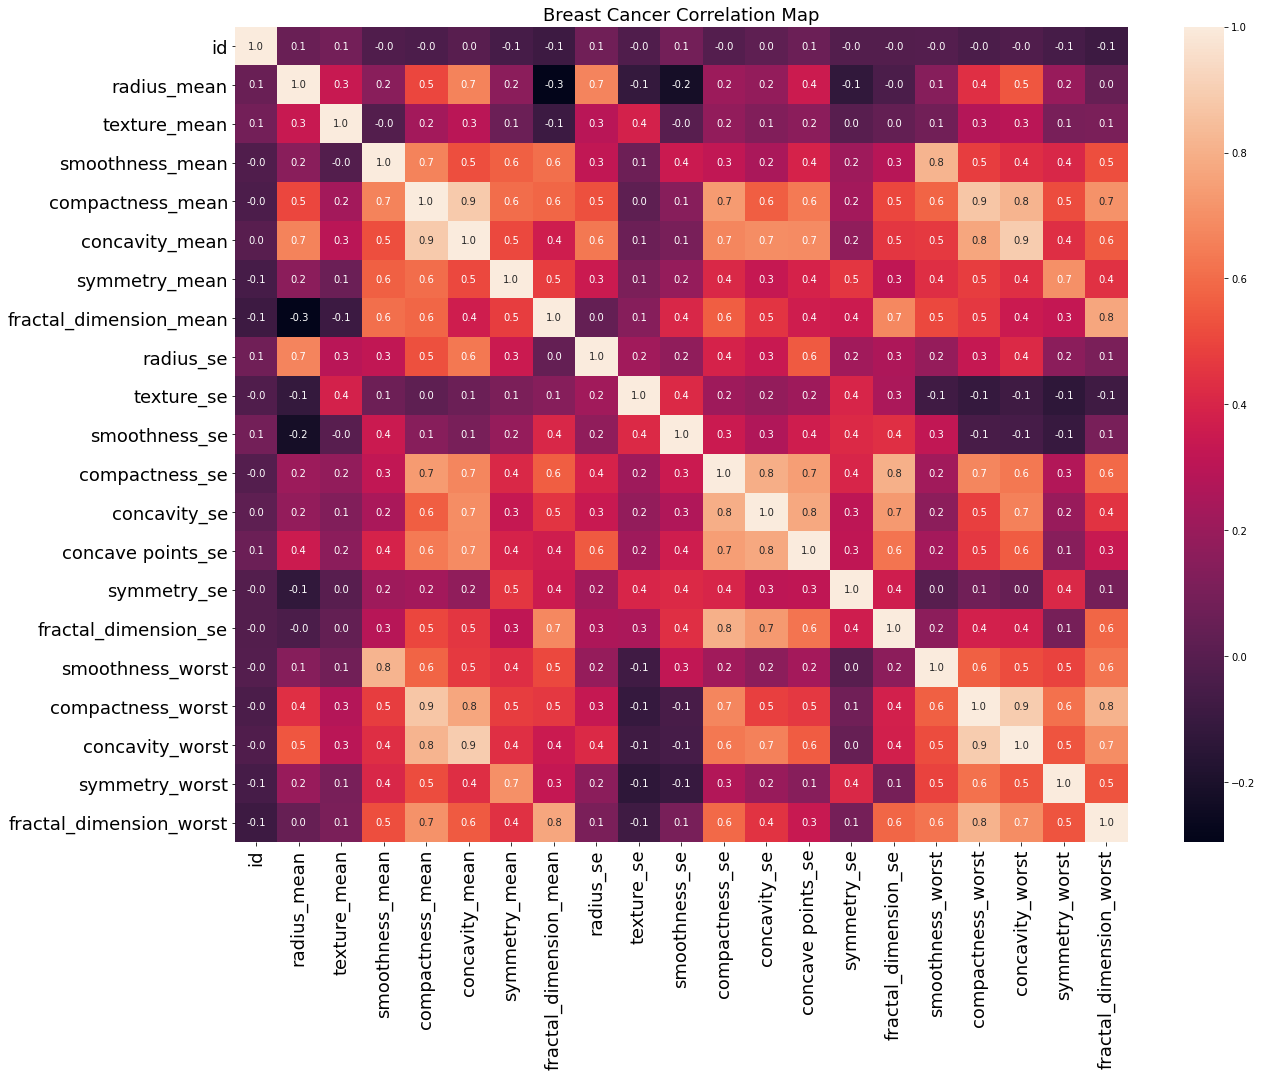

In [170]:
f, ax=plt.subplots( figsize = (20,15))
sns.heatmap(df.corr(), annot= True, fmt = ".1f", ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Breast Cancer Correlation Map', fontsize=18)
plt.show()

In [171]:
# Klasifikation modelleri üzerinde çalışıyrouz. Muster Definition.

In [172]:
#input ve output hazırlıycaz. ID ve diagnosis dışında çünkü bunlar eigenschaft değil. output içinde y variable yaratıcaz.

In [173]:
X = df.drop(columns = ["id", "diagnosis"])
y = df.diagnosis.values

In [174]:
#Datamızı geliştirmek için normalize etmek gerekir, bunun için sklearn içerisindeki StandartScaler komutu kullanılır.

In [175]:
#Her data normalize edlir model geliştirilmeden önce.

In [176]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns
= X.columns)

In [177]:
# Her özellik normalize edildi datamda

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=40)

In [179]:
#GaussianNB Klasifikation kullanılıcak. 

In [180]:
# naive denmesine rağmen datanın aksine bu model çok basit model olmasına rağmen doğru sonuç veriyo.
# Wechselwirkungları data arasında gösteremiyo ama çok iyi performans sağlıyo
# Olasılıklara dayalı method
# Olasılıklara dayalı bir method

In [181]:
# Aşşağıdaki modeli çağıracağız

In [182]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [183]:
gnb_clf = GaussianNB()

In [184]:
gnb_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [185]:
# Test data kullanıcaz ki test data ile modelimizi yüzde kaç dığrulukla y datasının x datasını verdiğini göreceğiz.

In [186]:
gnb_pred = gnb_clf.predict(X_test)
print(accuracy_score(gnb_pred, y_test))
0.95035

0.9064748201438849


0.95035

In [187]:
#

In [188]:
from sklearn.metrics import classification_report
print(classification_report(gnb_pred, y_test))

              precision    recall  f1-score   support

           B       0.92      0.93      0.92        83
           M       0.89      0.88      0.88        56

    accuracy                           0.91       139
   macro avg       0.90      0.90      0.90       139
weighted avg       0.91      0.91      0.91       139



In [189]:
import pickle
pickle.dump(gnb_clf, open("models/gnb_clf.pickle", 'wb'))

In [190]:
loaded_gnb_clf = pickle.load(open("models/gnb_clf.pickle", 'rb'))
loaded_gnb_clf.score(X_test, y_test)

0.9064748201438849

# UL-Clustering

In [232]:
df = pd.read_csv("datasets/dataset_wisc_sd.csv")
print(df.shape)

(569, 32)


In [233]:
df = df.replace(r'\\n','', regex=True)
df = df.dropna()
print(df.shape)


(562, 32)


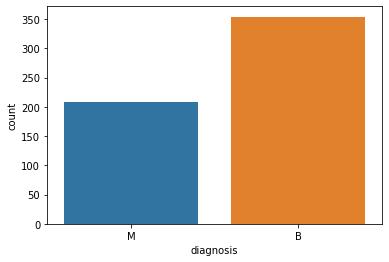

In [234]:
import seaborn as sns
sns.countplot(df['diagnosis']);

In [235]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [236]:
select_feats = ["diagnosis", "radius_mean", "texture_mean", "smoothness_mean"]


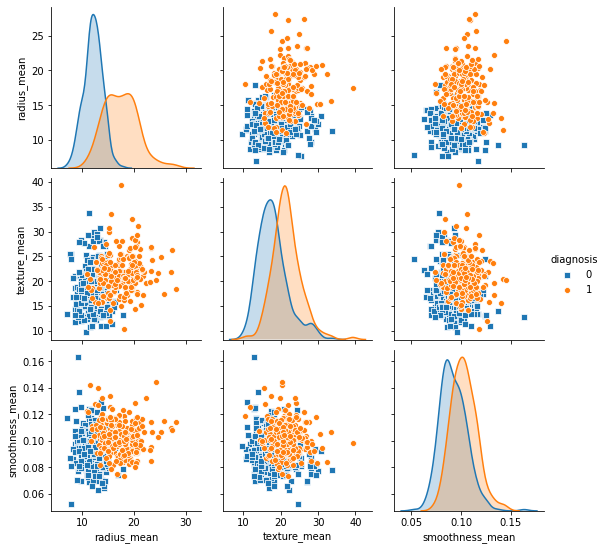

In [237]:
sns.pairplot(df[select_feats], hue = 'diagnosis', markers=["s", "o"])


<AxesSubplot:xlabel='radius_mean', ylabel='texture_mean'>

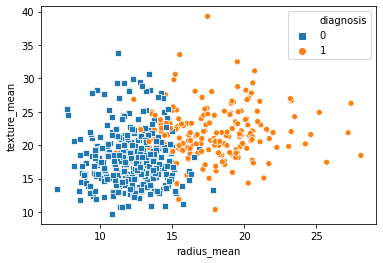

In [238]:
sns.scatterplot(x="radius_mean", y="texture_mean", hue="diagnosis", style= 'diagnosis', data= df, markers=["s","o"])

In [239]:
from sklearn.preprocessing import StandardScaler

In [240]:
scaler = StandardScaler()

In [256]:
x = df.drop(columns = ["id", "diagnosis"])
y = df.diagnosis.values

In [257]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [243]:
#Agglomerative clustering

In [258]:
from sklearn.cluster import AgglomerativeClustering

In [259]:
agc = AgglomerativeClustering(n_clusters=2, linkage="ward")

In [260]:
agc_featAll_pred = agc.fit_predict(X_scaled.iloc[:, :2])

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

ValueError: array length 562 does not match index length 553

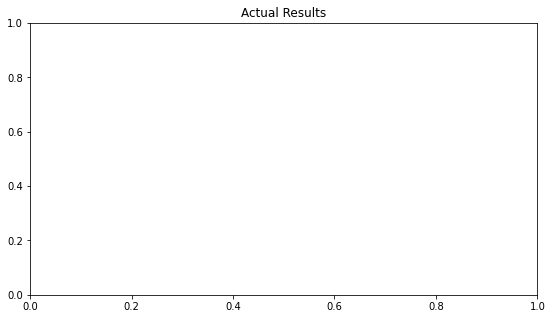

In [262]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.title("Actual Results")
ax = sns.scatterplot(x="radius_mean", y="texture_mean", hue=y, style=y, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")
plt.subplot(122)
plt.title("Agglomerative Clustering")
ax = sns.scatterplot(x="radius_mean", y="texture_mean", hue=agc_featAll_pred, style=agc_featAll_pred, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

In [249]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, agc_featAll_pred))

ValueError: Found input variables with inconsistent numbers of samples: [562, 553]

In [ ]:
#K-Means clustering

In [212]:
from sklearn.cluster import KMeans


In [214]:
kmc = KMeans(n_clusters=2, n_init=10, init="k-means++")

In [215]:
kmc_feat2_pred = kmc.fit_predict(X_scaled.iloc[:, :2])


ValueError: array length 562 does not match index length 553

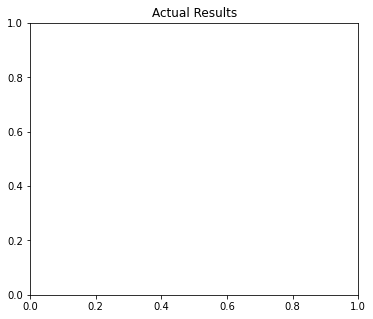

In [226]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.title("Actual Results")
ax = sns.scatterplot(x="radius_mean", y="texture_mean", hue=y, style=y, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

plt.subplot(132)
plt.title("KMeans Results (Features=2)")
ax = sns.scatterplot(x="radius_mean", y="texture_mean", hue= kmc_feat2_pred , style= kmc_feat2_pred, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

In [220]:
kmc_feat2_pred =kmc.fit_predict(X_scaled.iloc[:, :2])
kmc_feat3_pred =kmc.fit_predict(X_scaled.iloc[:, :3])
kmc_feat4_pred =kmc.fit_predict(X_scaled.iloc[:, :4])
kmc_featall_pred=kmc.fit_predict(X_scaled.iloc[:, :])

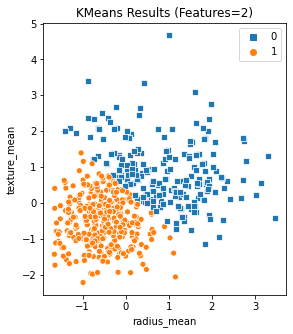

In [221]:
plt.figure(figsize=(20, 5))
plt.subplot(141)
plt.title("KMeans Results (Features=2)")
ax = sns.scatterplot(x="radius_mean", y="texture_mean",
hue=kmc_feat2_pred, style=kmc_feat2_pred, data=X_scaled,
markers=["s", "o"])
ax.legend(loc="upper right")
# Apply the same for the other plots

ValueError: array length 562 does not match index length 553

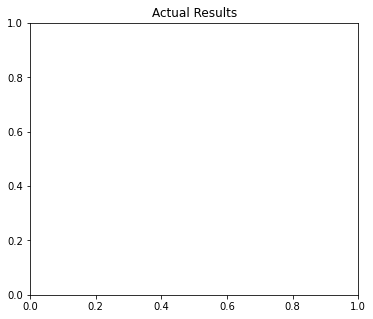

In [223]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.title("Actual Results")
ax = sns.scatterplot(x="radius_mean", y="texture_mean",
hue=y, style=y, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")
plt.subplot(132)
plt.title("Gaussian Mixture Results (Features=All)")
ax = sns.scatterplot(x="radius_mean", y="texture_mean",
hue=gmm_featAll_pred, style=gmm_featAll_pred, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

In [ ]:
#RD

In [263]:
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2, svd_solver='full')
pca_2d.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [264]:
data_pca_2d = pca_2d.fit_transform(X_scaled)

ValueError: All arrays must be of the same length

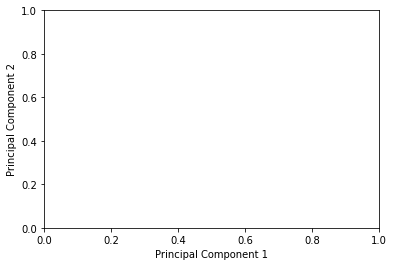

In [265]:
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
sns.scatterplot(x=data_pca_2d[:,0], y=data_pca_2d[:,1],
hue=y, style=y, markers=["s", "o"])
